# Meshing library examples

Imports

In [1]:
from mesh_lib import *
import numpy as np
import pandas as pd; pd.options.mode.chained_assignment = None; pd.set_option('display.max_columns', 500)

Set domain

In [2]:
domain = [(0,0), (1,0), (1,1), (0,1)]

Generate basic mesh and compare

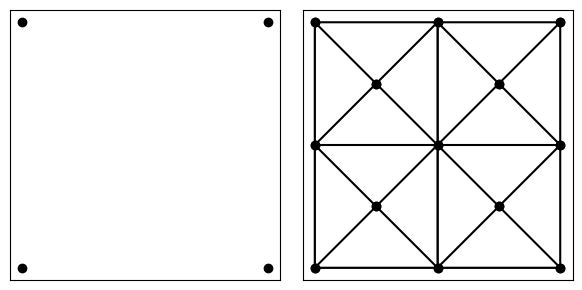

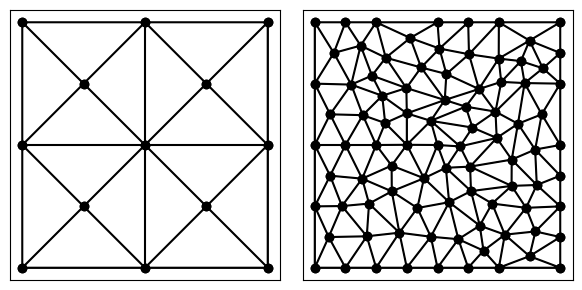

In [3]:
mesh_coarse = Mesh(domain)
mesh_coarse.generate_mesh(h=0.1)

mesh_fine = Mesh(domain)
mesh_fine.generate_mesh(h=0.01)

mesh_coarse.compare()
mesh_coarse.compare(mesh_fine)


Evaluate (roughly) the mesh

In [4]:
# print(f'Max. edge length: {mesh_coarse.max_H()}')
# print(f'Min. edge length: {mesh_coarse.min_H()}')

# print(f'Max. edge length: {mesh_fine.max_H()}')
# print(f'Min. edge length: {mesh_fine.min_H()}')

Generate basic mesh (specify max. edge length)

In [5]:
# mesh = Mesh(domain)
# a = mesh.specify_edge_length(h = 0.1)
# mesh.generate_mesh(h=a)
# mesh.compare()

Create a sub-mesh on a single element

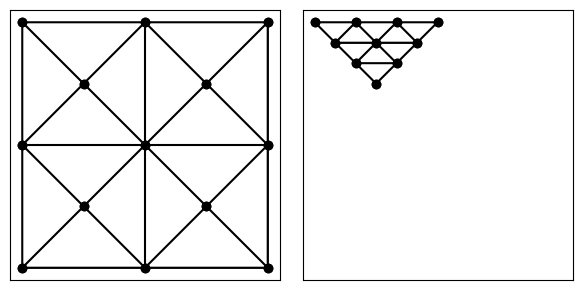

In [6]:
mesh = Mesh(domain, H = 0.1)
sub_mesh = mesh.generate_sub_mesh(element=2, N=4)
mesh.compare(sub_mesh)

Create a sub-mesh over all elements

Refinement ratio: 0.11785113019775766


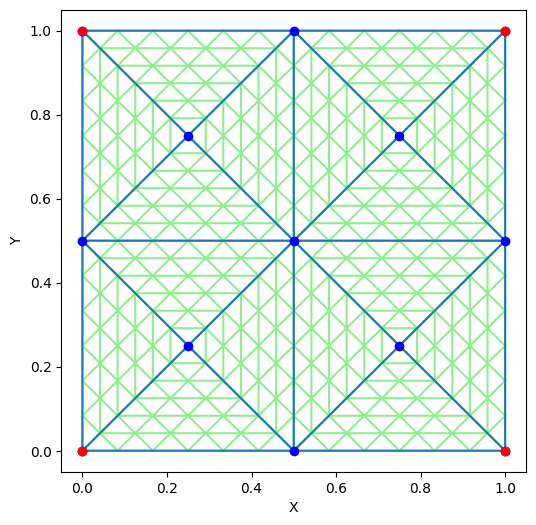

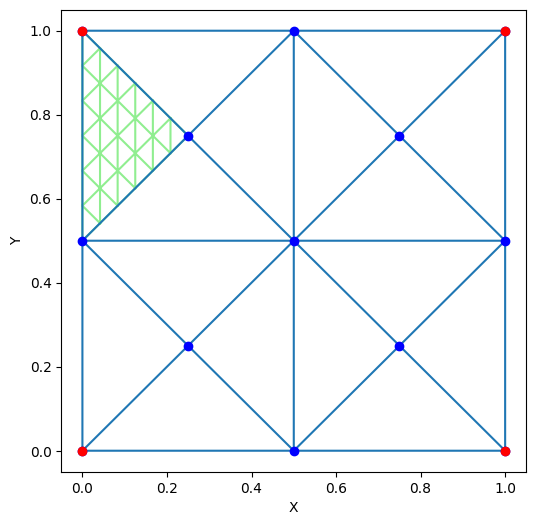

Max. edge length: H_max = 0.5
Min. edge length: H_min = 0.3535533905932738
Min. edge length (sub_mesh): h_min = 0.05892556509887883


In [7]:
mesh = Mesh(domain)
mesh.generate_full_mesh(0.1, 7)
print(f"Refinement ratio: {mesh.get_refinement_ratio()}")

# Plot all sub-elements
mesh.plot_sub_mesh()

# Plot specified elements
mesh.plot_sub_mesh([3])

print(f'Max. edge length: H_max = {mesh.max_H()}')
print(f'Min. edge length: H_min = {mesh.min_H()}')
print(f'Min. edge length (sub_mesh): h_min = {mesh.min_h()}')

Show translation of nodes/points from the reference triangle to arb. triangles

In [8]:
# nodes, weights = mesh.GLQ()
# points = mesh._get_element_points(6)
# translated_points, J = mesh.translate(nodes, points)

# print(f"Determinant: {J}")

# plt.triplot([0, 1, 0], [0, 0, 1])
# plt.scatter(nodes[:,0], nodes[:,1], c='r')
# plt.show()

# plt.triplot(points[:,0], points[:,1])
# plt.scatter(translated_points[:,0], translated_points[:,1], c='r')
# plt.show()

Integration example

In [9]:
# from time import time

# def f(x):
#     return np.square(x[:,0]+x[:,1])

# mesh = Mesh(domain)
# mesh.generate_mesh(0.01)

In [10]:
# %%timeit
# I, i = mesh.integrate(f)

In [11]:
# print(f"Result: {i}")
# print(f"Error = {7/6 - i}")
# mesh.convergence(f, 7/6)

Check we can match vertices of finer mesh along the edges of the coarser mesh?


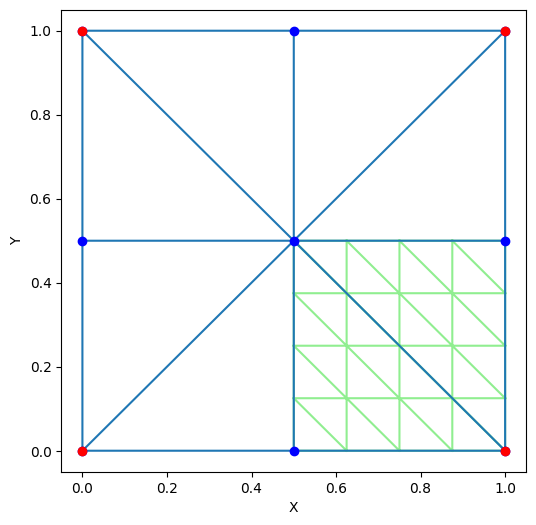

In [12]:
mesh = Mesh(domain, H = 0.2, N = 5)
mesh.plot_sub_mesh([6, 5])

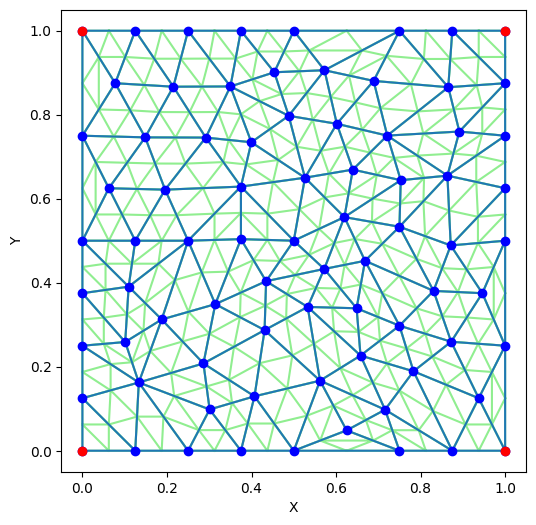

In [13]:
mesh = Mesh(domain, H = 0.012, N = 3)
mesh.plot_sub_mesh()

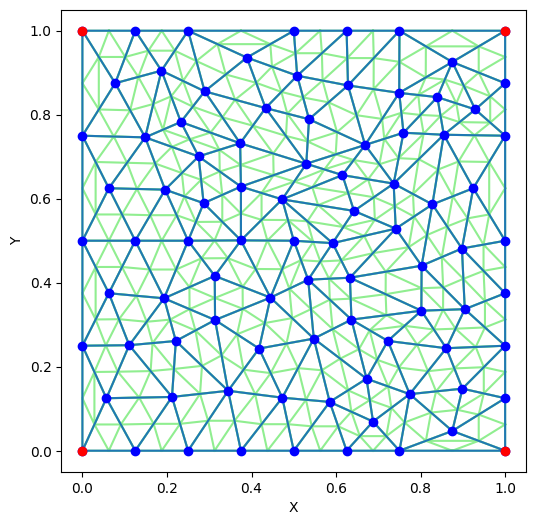

In [14]:
mesh = Mesh(domain, H = 0.01, N = 3)
mesh.plot_sub_mesh()

# print("Vertices of sub mesh:")
# print(mesh.meshed_elements[0].mesh['vertices'])

# print("Vertex markers:")
# print(mesh.meshed_elements[0].mesh['vertex_markers'])

# print("Edges of sub mesh:")
# print(mesh.meshed_elements[0].mesh['edges'])

# print("Edge markers:")
# print(mesh.meshed_elements[0].mesh['edge_markers'])

# print("Edge ids:")
# print(mesh.meshed_elements[0].mesh['edge_ids'])

# print("Flipped:")
# print(mesh.meshed_elements[0].mesh['flipped'])

In [15]:
mesh.generate_dfs()
print(mesh.triangles_df.to_string())

    local_id            nodes            edges big_triangle_id
0          0        [0, 1, 3]        [0, 1, 2]               0
1          1        [1, 4, 3]        [2, 3, 4]               0
2          2        [1, 2, 4]        [5, 3, 6]               0
3          3        [3, 4, 5]        [4, 7, 8]               0
4          0        [6, 7, 9]      [9, 10, 11]               1
5          1       [7, 10, 9]     [11, 12, 13]               1
6          2       [7, 8, 10]     [14, 12, 15]               1
7          3      [9, 10, 11]     [13, 16, 17]               1
8          0     [12, 13, 15]     [18, 19, 20]               2
9          1     [13, 16, 15]     [20, 21, 22]               2
10         2     [13, 14, 16]     [23, 21, 24]               2
11         3     [15, 16, 17]     [22, 25, 26]               2
12         0     [12, 18, 13]     [18, 27, 28]               3
13         1     [18, 20, 13]     [28, 30, 29]               3
14         2     [18, 19, 20]     [31, 29, 32]         

In [16]:

print(mesh.nodes_df.to_string())

    local_id         x         y                    big_triangle_id  boundary  internal                      lil_triangle_id
0          0  0.672090  0.171457        [0, 96, 127, 129, 130, 148]     False     False         [0, 387, 511, 518, 520, 592]
1          1  0.723182  0.153102                           [0, 129]     False     False             [0, 1, 2, 516, 517, 518]
2          2  0.774275  0.134747  [0, 121, 123, 129, 131, 139, 146]     False     False    [2, 486, 492, 516, 526, 558, 584]
3          3  0.697286  0.216449                           [0, 130]     False     False             [0, 1, 3, 520, 521, 522]
4          4  0.748378  0.198094                           [0, 121]     False     False             [1, 2, 3, 484, 485, 486]
5          5  0.722482  0.261441            [0, 121, 130, 141, 149]     False     False              [3, 484, 522, 564, 599]
6          0  0.077560  0.875000                [1, 23, 42, 45, 46]     False     False               [4, 95, 171, 182, 187]


In [17]:
print(mesh.edges_df.to_string())

    local_id       nodes big_triangle_id             midpoints
0          0      [0, 1]        [0, 129]   [0.697636, 0.16228]
1          1      [0, 3]        [0, 130]  [0.684688, 0.193953]
2          2      [1, 3]             [0]  [0.710234, 0.184775]
3          3      [1, 4]             [0]   [0.73578, 0.175598]
4          4      [3, 4]             [0]  [0.722832, 0.207272]
5          5      [1, 2]        [0, 129]  [0.748728, 0.143924]
6          6      [2, 4]        [0, 121]   [0.761326, 0.16642]
7          7      [3, 5]        [0, 130]  [0.709884, 0.238945]
8          8      [4, 5]        [0, 121]   [0.73543, 0.229768]
9          0      [6, 7]         [1, 23]    [0.05817, 0.84375]
10         1      [6, 9]         [1, 45]   [0.09528, 0.842774]
11         2      [7, 9]             [1]   [0.07589, 0.811524]
12         3     [7, 10]             [1]  [0.056499, 0.780274]
13         4     [9, 10]             [1]  [0.093609, 0.779297]
14         5      [7, 8]         [1, 23]    [0.01939, 0

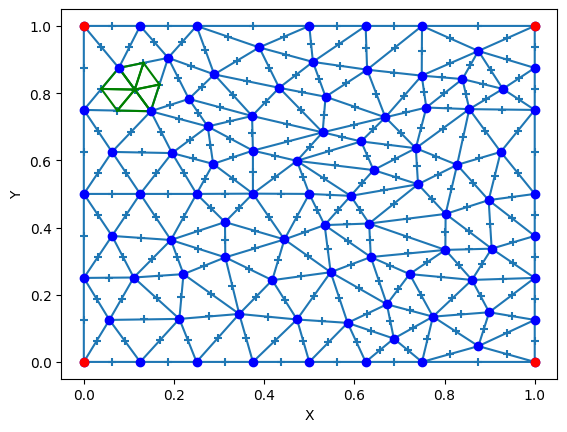

In [18]:
mesh.plot_point(9)
    